In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(style="whitegrid")


In [21]:
df = pd.read_csv('credit_risk_dataset.csv')

df.head()
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [22]:
print("Shape:", df.shape)
df.info()

print("\nMissing values per column:")
display(df.isnull().sum())

df.describe(include="all").T


Shape: (32581, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB

Missing val

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,32581.0,NaN,NaN,NaN,27.7346,6.348078,20.0,23.0,26.0,30.0,144.0
person_income,32581.0,NaN,NaN,NaN,66074.84847,61983.119168,4000.0,38500.0,55000.0,79200.0,6000000.0
person_home_ownership,32581,4,RENT,16446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,31686.0,NaN,NaN,NaN,4.789686,4.14263,0.0,2.0,4.0,7.0,123.0
loan_intent,32581,6,EDUCATION,6453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_grade,32581,7,A,10777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,32581.0,NaN,NaN,NaN,9589.371106,6322.086646,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,29465.0,NaN,NaN,NaN,11.011695,3.240459,5.42,7.9,10.99,13.47,23.22
loan_status,32581.0,NaN,NaN,NaN,0.218164,0.413006,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32581.0,NaN,NaN,NaN,0.170203,0.106782,0.0,0.09,0.15,0.23,0.83


In [23]:
# Kalau ada kolom target, drop (unsupervised)
target_cols = [c for c in df.columns if c.lower() in ["loan_status", "target", "default", "y"]]
print("Detected target columns:", target_cols)

X = df.drop(columns=target_cols) if len(target_cols) > 0 else df.copy()
print("Feature shape:", X.shape)

X.head()


Detected target columns: ['loan_status']
Feature shape: (32581, 11)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [24]:
# Pisahkan numeric vs categorical
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

print("Numeric cols:", list(num_cols))
print("Categorical cols:", list(cat_cols))

# Isi missing numeric dengan median
for c in num_cols:
    X[c] = X[c].fillna(X[c].median())

# Isi missing categorical dengan modus
for c in cat_cols:
    X[c] = X[c].fillna(X[c].mode()[0])

X.isnull().sum().sort_values(ascending=False).head(10)


Numeric cols: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Categorical cols: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


person_age                   0
person_income                0
person_home_ownership        0
person_emp_length            0
loan_intent                  0
loan_grade                   0
loan_amnt                    0
loan_int_rate                0
loan_percent_income          0
cb_person_default_on_file    0
dtype: int64

In [25]:
# One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Shape after encoding:", X_encoded.shape)
X_encoded.head()


Shape after encoding: (32581, 22)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,False,False,True,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0.10,2,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,0.57,3,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,0.53,2,False,False,True,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,0.55,4,False,False,True,...,True,False,False,False,True,False,False,False,False,True


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_scaled[:5]


array([[-9.03373832e-01, -1.14143288e-01,  2.89266135e+01,
         4.01940376e+00,  1.62592119e+00,  3.93141080e+00,
        -6.91554445e-01, -5.74015997e-02, -2.93499485e-01,
         9.90499685e-01, -4.96967226e-01, -3.52722706e-01,
        -4.78547721e-01,  2.21388482e+00, -4.61414115e-01,
        -6.87208016e-01, -4.97207299e-01,  2.82584206e+00,
        -1.74613649e-01, -8.63253829e-02, -4.43644142e-02,
         2.16129414e+00],
       [-1.06090423e+00, -9.11146711e-01,  5.67626247e-02,
        -1.35864998e+00,  4.23096785e-02, -6.57458471e-01,
        -9.38167283e-01, -5.74015997e-02,  3.40716101e+00,
        -1.00959144e+00,  2.01220513e+00, -3.52722706e-01,
        -4.78547721e-01, -4.51694682e-01, -4.61414115e-01,
         1.45516347e+00, -4.97207299e-01, -3.53876819e-01,
        -1.74613649e-01, -8.63253829e-02, -4.43644142e-02,
        -4.62685751e-01],
       [-4.30782625e-01, -9.11146711e-01, -9.21876389e-01,
        -6.46848753e-01,  6.03712940e-01,  3.74411001e+00,
    

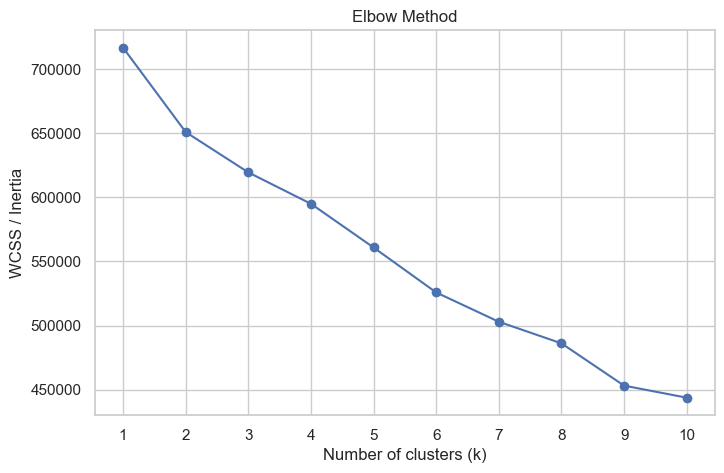

In [27]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS / Inertia")
plt.xticks(K_range)
plt.grid(True)
plt.show()


In [28]:
optimal_k = 4  # ganti sesuai elbow kamu
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df["Cluster"].value_counts().sort_index()


Cluster
0     9299
1     3381
2    15325
3     4576
Name: count, dtype: int64

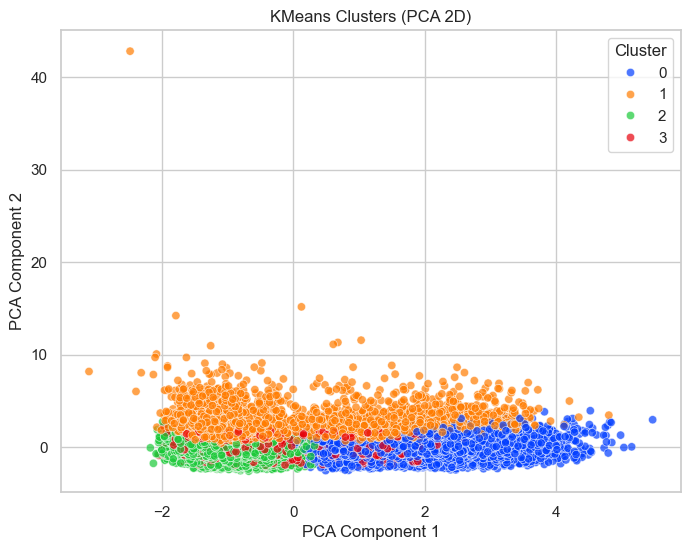

In [29]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="bright", alpha=0.7)
plt.title("KMeans Clusters (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [30]:
cluster_profile = df.groupby("Cluster").mean(numeric_only=True)
cluster_profile


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
Cluster,,,,,,,,
0,26.297989,62923.973438,4.325362,10169.744059,14.541753,0.371975,0.182444,4.898914
1,41.441290,88583.311742,6.741525,10262.740314,10.856764,0.190476,0.158956,14.551612
2,25.925024,64803.562545,4.696653,9252.349103,9.110887,0.130571,0.165052,4.638825
3,26.586976,60104.859266,4.601394,9041.144012,10.265540,0.219406,0.170892,5.083698


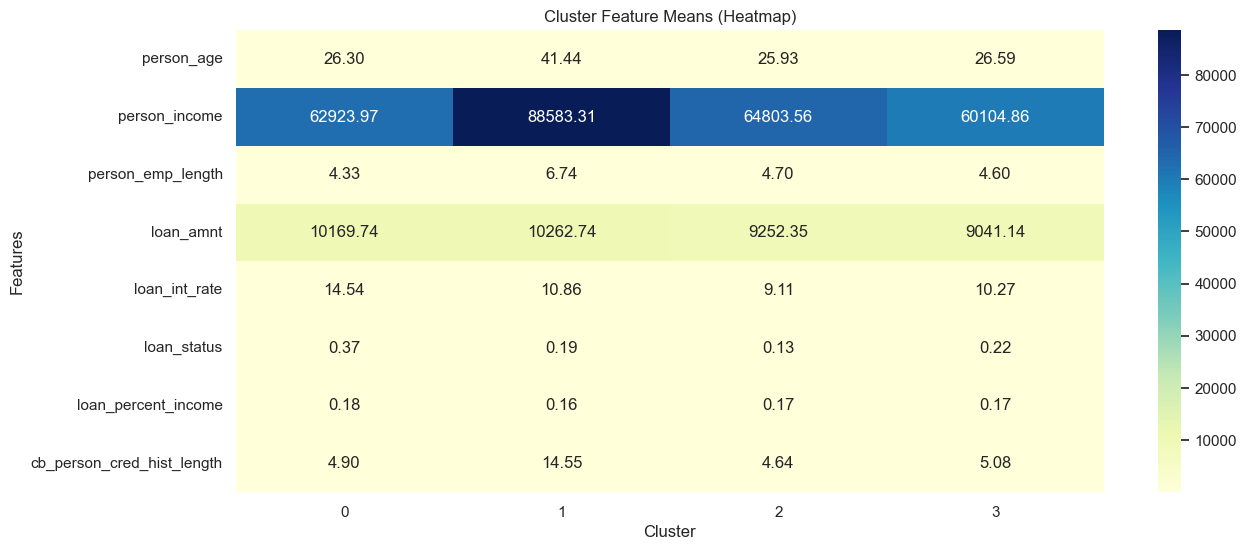

In [31]:
plt.figure(figsize=(14,6))
sns.heatmap(cluster_profile.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Cluster Feature Means (Heatmap)")
plt.ylabel("Features")
plt.xlabel("Cluster")
plt.show()


Key features used: ['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'person_age', 'cb_person_cred_hist_length']


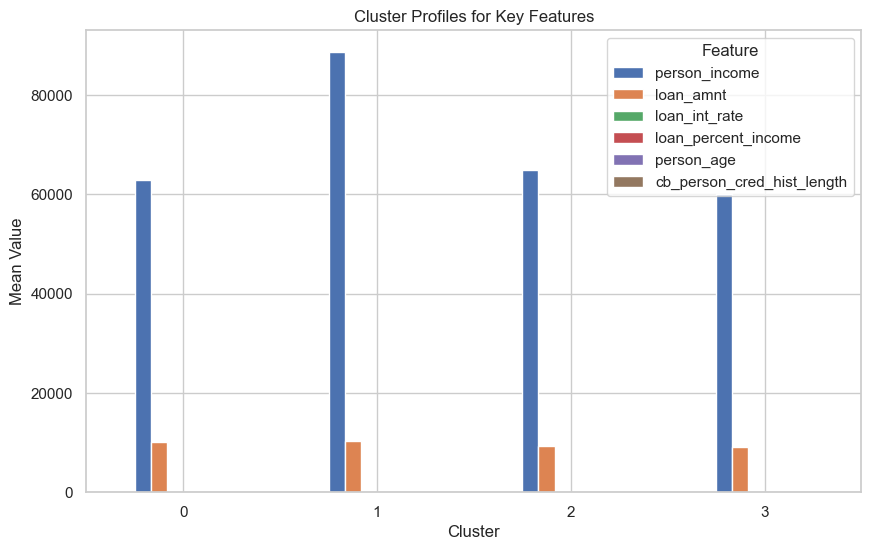

In [32]:
# pilih fitur numerik penting yang ada di dataset kamu
key_features = [c for c in ["person_income","loan_amnt","loan_int_rate",
                           "loan_percent_income","person_age","cb_person_cred_hist_length"]
                if c in df.columns]

print("Key features used:", key_features)

cluster_profile[key_features].plot(kind="bar", figsize=(10,6))
plt.title("Cluster Profiles for Key Features")
plt.ylabel("Mean Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(title="Feature")
plt.show()


In [33]:
df.to_csv("credit_risk_with_clusters.csv", index=False)
print("Saved: credit_risk_with_clusters.csv")


Saved: credit_risk_with_clusters.csv
